### Análise de Mercado SNC-Lavalin

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import DataReader as wb
from quandl import get as qdl
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('bmh')

,SNC-LAVALIN,BANCO_CENTRAL_CANADA,BOVESPA,VALE,BITCOIN,OURO,DOLAR,MINERIO_DE_FERRO
count,623.000000,612.000000,593.000000,593.000000,552.000000,605.000000,551.000000,607.000000
mean,37.180925,51.842366,91704.857438,47.995690,7602.073087,1393.236529,3.993047,79.702735
std,13.942216,4.429112,12460.618915,4.834275,2436.576277,158.831396,0.548132,12.099906
min,15.461376,33.382996,63570.000000,34.099998,3242.484375,1176.199951,3.145100,61.600000
25%,23.996503,51.114461,81533.000000,44.702820,6320.303101,1282.000000,3.728350,68.375000
50%,33.998505,52.892141,91012.000000,48.533939,7624.915039,1326.400024,3.879400,80.150000
75%,52.328119,54.765652,101135.000000,51.222691,9273.732422,1502.199951,4.146450,87.435000
max,59.518909,56.965736,119528.000000,60.594360,17429.498047,1771.000000,5.886400,112.080000


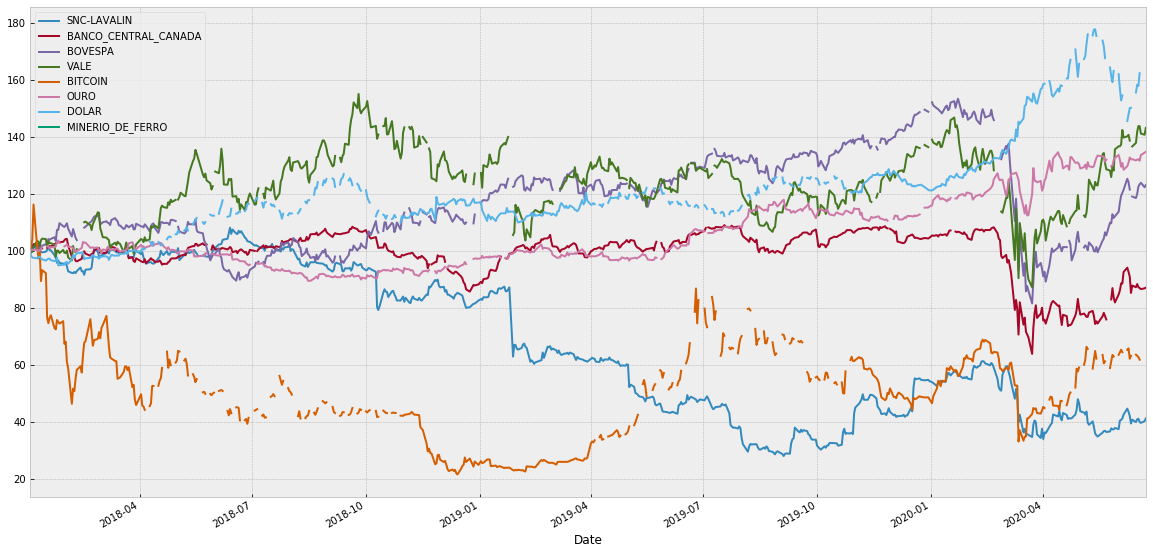

In [2]:
tickers = ['SNC.TO', 'TD', '^BVSP', 'VALE3.SA', 'BTCUSD=X', 'GC=F', 'USDBRL=X']
df = pd.DataFrame()
for t in tickers:
    try:
        df[t] = wb(t, data_source='yahoo', start='2018-01-01')['Adj Close']
    except:
        pass

df['IronOre'] = qdl('CHRIS/CME_TIO3-Iron-Ore-62-Fe-CFR-China-TSI-Futures-Continuous-Contract-3-TIO3')['Settle']

tickers = ['SNC-LAVALIN', 'BANCO_CENTRAL_CANADA', 'BOVESPA', 'VALE', 'BITCOIN', 'OURO', 'DOLAR', 'MINERIO_DE_FERRO']

df.set_axis(tickers, axis='columns', inplace=True)

(df / df.iloc[0] * 100).plot(figsize=(20,10))
df.describe()

In [3]:
df.tail(7)

,SNC-LAVALIN,BANCO_CENTRAL_CANADA,BOVESPA,VALE,BITCOIN,OURO,DOLAR,MINERIO_DE_FERRO
Date,,,,,,,,
2020-06-15,22.010000,45.590000,92376.000000,53.880001,9538.025391,1731.400024,5.15321,97.45
2020-06-16,22.549999,46.169998,93531.000000,55.389999,9482.974609,1735.400024,5.24360,99.30
2020-06-17,22.660000,45.610001,95547.000000,56.200001,9412.436523,1736.900024,5.22790,97.98
2020-06-18,22.040001,45.419998,96125.000000,56.169998,9274.365234,1729.800049,5.37720,97.15
2020-06-19,21.860001,45.240002,96572.000000,55.169998,NaN,1756.199951,NaN,97.49
2020-06-22,22.190001,45.389999,95336.000000,55.000000,9621.255859,1767.300049,NaN,97.15
2020-06-23,22.709999,45.509998,95934.460938,55.939999,NaN,1771.000000,5.14670,NaN


In [4]:
log_returns = np.log(df / df.shift(1))

std_returns = log_returns.std()

var_returns = log_returns.var() * 250 ** 0.5

cov_returns = log_returns.cov() * 250

cor_returns = log_returns.corr()

In [5]:
log_returns.tail()

,SNC-LAVALIN,BANCO_CENTRAL_CANADA,BOVESPA,VALE,BITCOIN,OURO,DOLAR,MINERIO_DE_FERRO
Date,,,,,,,,
2020-06-17,0.004866,-0.012203,0.021325,0.014518,-0.007466,0.000864,-0.002999,-0.013382
2020-06-18,-0.027742,-0.004175,0.006031,-0.000534,-0.014778,-0.004096,0.028158,-0.008507
2020-06-19,-0.008201,-0.003971,0.004639,-0.017963,NaN,0.015147,NaN,0.003494
2020-06-22,0.014983,0.003310,-0.012881,-0.003086,NaN,0.006301,NaN,-0.003494
2020-06-23,0.023164,0.002640,0.006258,0.016946,NaN,0.002091,NaN,NaN


In [6]:
std_returns * 100

SNC-LAVALIN             3.322400
BANCO_CENTRAL_CANADA    1.818879
BOVESPA                 2.066459
VALE                    2.698010
BITCOIN                 4.930400
OURO                    0.974168
DOLAR                   1.051657
MINERIO_DE_FERRO        1.954999
dtype: float64

In [7]:
var_returns * 100

SNC-LAVALIN             1.745316
BANCO_CENTRAL_CANADA    0.523091
BOVESPA                 0.675186
VALE                    1.150951
BITCOIN                 3.843566
OURO                    0.150051
DOLAR                   0.174871
MINERIO_DE_FERRO        0.604315
dtype: float64

In [8]:
cov_returns

,SNC-LAVALIN,BANCO_CENTRAL_CANADA,BOVESPA,VALE,BITCOIN,OURO,DOLAR,MINERIO_DE_FERRO
SNC-LAVALIN,0.275959,0.073287,0.072699,0.075747,0.080205,-0.001374,-0.014713,0.013346
BANCO_CENTRAL_CANADA,0.073287,0.082708,0.071929,0.080791,0.061222,-0.001453,-0.007829,0.015605
BOVESPA,0.072699,0.071929,0.106756,0.096623,0.080493,-0.001199,-0.010072,0.011960
VALE,0.075747,0.080791,0.096623,0.181981,0.083740,-0.000122,-0.004666,0.037629
BITCOIN,0.080205,0.061222,0.080493,0.083740,0.607721,0.007990,-0.006924,0.006426
OURO,-0.001374,-0.001453,-0.001199,-0.000122,0.007990,0.023725,0.000267,-0.004141
DOLAR,-0.014713,-0.007829,-0.010072,-0.004666,-0.006924,0.000267,0.027650,-0.000971
MINERIO_DE_FERRO,0.013346,0.015605,0.011960,0.037629,0.006426,-0.004141,-0.000971,0.095551


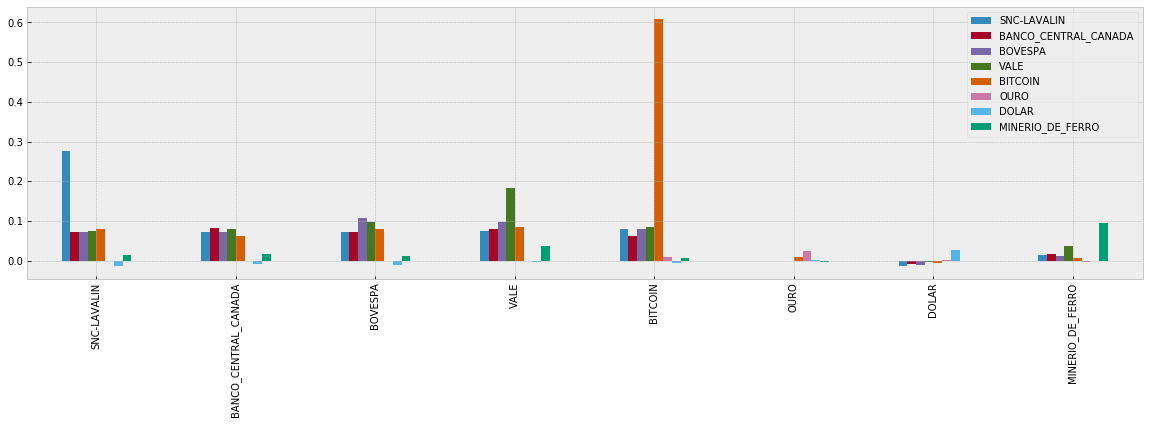

In [9]:
cov_returns[tickers].plot(kind='bar', figsize=(20,5))

In [10]:
cor_returns

,SNC-LAVALIN,BANCO_CENTRAL_CANADA,BOVESPA,VALE,BITCOIN,OURO,DOLAR,MINERIO_DE_FERRO
SNC-LAVALIN,1.000000,0.478518,0.459025,0.366319,0.182412,-0.016636,-0.156733,0.080707
BANCO_CENTRAL_CANADA,0.478518,1.000000,0.753642,0.649808,0.253873,-0.032623,-0.150437,0.174601
BOVESPA,0.459025,0.753642,1.000000,0.693222,0.296309,-0.023238,-0.173171,0.116580
VALE,0.366319,0.649808,0.693222,1.000000,0.237624,-0.001813,-0.061844,0.282247
BITCOIN,0.182412,0.253873,0.296309,0.237624,1.000000,0.065422,-0.053378,0.026990
OURO,-0.016636,-0.032623,-0.023238,-0.001813,0.065422,1.000000,0.010077,-0.086693
DOLAR,-0.156733,-0.150437,-0.173171,-0.061844,-0.053378,0.010077,1.000000,-0.019100
MINERIO_DE_FERRO,0.080707,0.174601,0.116580,0.282247,0.026990,-0.086693,-0.019100,1.000000


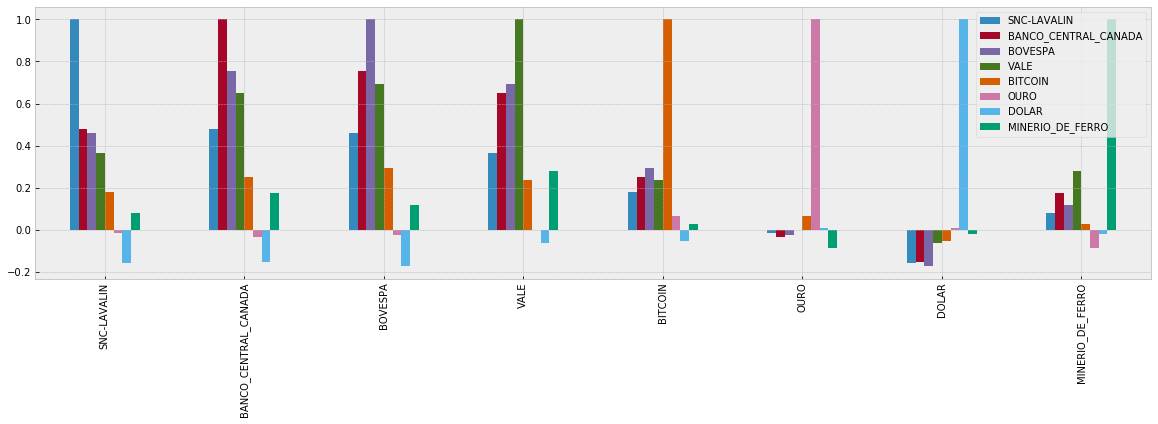

In [11]:
cor_returns.plot(kind='bar', figsize=(20,5))

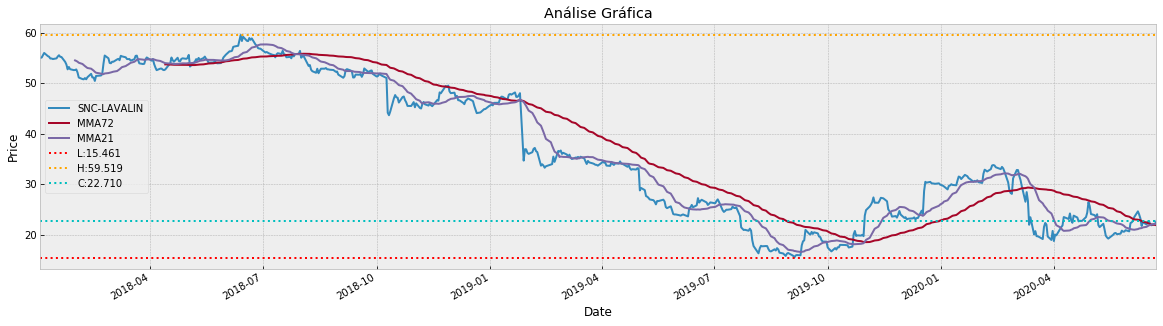

In [12]:
df[tickers[0]].plot(figsize=(20,5))
df[tickers[0]].rolling(72).mean().plot(label='MMA72')
df[tickers[0]].rolling(21).mean().plot(label='MMA21')

plt.axhline(df[tickers[0]].min(), color='r', linestyle=':', label=f'L:{df[tickers[0]].min():0.3f}')
plt.axhline(df[tickers[0]].max(), color='orange', linestyle=':', label=f'H:{df[tickers[0]].max():0.3f}')
plt.axhline(df[tickers[0]].iloc[-1], color='c', linestyle=':', label=f'C:{df[tickers[0]].iloc[-1]:0.3f}')

plt.title('Análise Gráfica')

plt.ylabel('Price')

plt.legend()

plt.show()